## Clustering of iris flower using supervised learning algorthm

In [1]:
# lib data manipulations
import numpy as np
import pandas as pd

# lib data visualizaton
import seaborn as sns
import matplotlib.pyplot as plt

# lib data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# lib supervised learning
from sklearn.cluster import KMeans

### 1. Data Acquisition

In [2]:
# load dataset
dataset = pd.read_csv("../dataset/dataset_iris.csv")# show dataset

In [3]:
# show metadata
print(np.round(dataset.describe(),2))

       sepal_length  sepal_width  petal_length  petal_width
count        150.00       150.00        150.00       150.00
mean           5.84         3.05          3.76         1.20
std            0.83         0.43          1.76         0.76
min            4.30         2.00          1.00         0.10
25%            5.10         2.80          1.60         0.30
50%            5.80         3.00          4.35         1.30
75%            6.40         3.30          5.10         1.80
max            7.90         4.40          6.90         2.50


### 2. Data Preprocessing

In [4]:
# Set features and Labels
x = dataset[["sepal_length","sepal_width","petal_length","petal_width"]].values
y = dataset["species"].values

In [5]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(x)

In [6]:
# results normalized
df_normalize = pd.concat([
  pd.DataFrame(scaled, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"]),
  pd.DataFrame(y, columns=["species"])
], axis=1)

# results normalized
print(df_normalize.head())

   sepal_length  sepal_width  petal_length  petal_width species
0      0.222222     0.625000      0.067797     0.041667  setosa
1      0.166667     0.416667      0.067797     0.041667  setosa
2      0.111111     0.500000      0.050847     0.041667  setosa
3      0.083333     0.458333      0.084746     0.041667  setosa
4      0.194444     0.666667      0.067797     0.041667  setosa


In [7]:
# split validation
trainX, testX, trainY, testY = train_test_split(
  scaled, y, train_size=0.75, test_size=0.25, random_state=0, shuffle=True
)

In [8]:
# show dimension of data train
print(trainX.shape, trainY.shape)

(112, 4) (112,)


In [9]:
# show dimension of data test
print(testX.shape, testY.shape)

(38, 4) (38,)


### 3. Data Visualization

In [10]:
# fucn scatterplot
def scatter(data, x1, y1, title1, x2, y2, title2):

  # create two frame
  fig, ax = plt.subplots(1, 2, figsize = (15,4))

  # create scatterplot
  sns.scatterplot(data=data, x=x1, y=y1, hue="species", ax=ax[0])

  # set labels
  ax[0].set_title(title1, fontsize=12)
  ax[0].set_xlabel("", fontsize=12)
  ax[0].set_ylabel("", fontsize=12)
  ax[0].legend(loc='best')
  ax[0].grid(True)

  # create scatterplot
  sns.scatterplot(data=data, x=x2, y=y2, hue="species", ax=ax[1])

  # set labels
  ax[1].set_title(title2, fontsize=12)
  ax[1].set_xlabel("", fontsize=12)
  ax[1].set_ylabel("", fontsize=12)
  ax[1].legend(loc='best')
  ax[1].grid(True)

  # return values
  plt.tight_layout()
  plt.show()

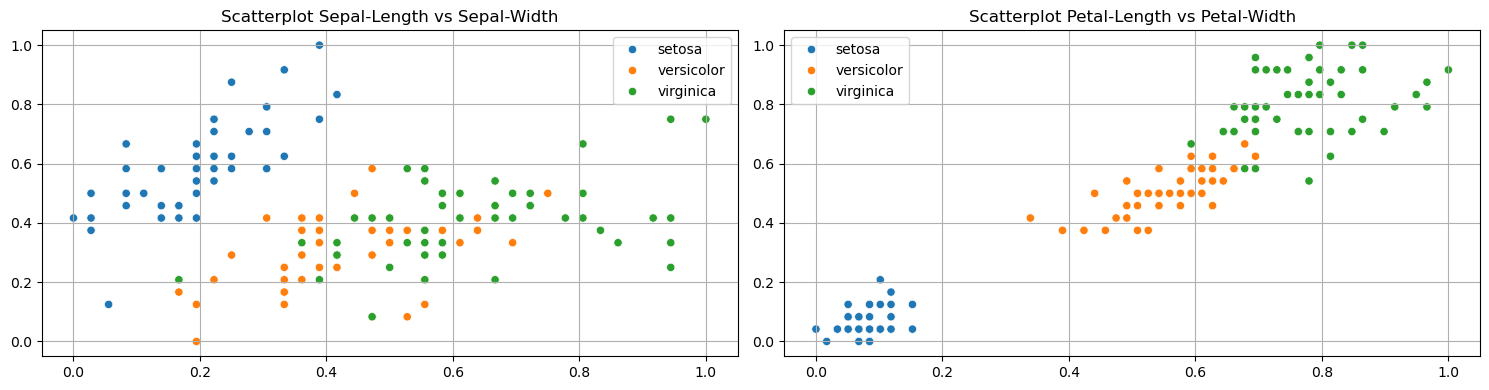

In [11]:
scatter(
  data=df_normalize,
  x1="sepal_length", y1="sepal_width", title1="Scatterplot Sepal-Length vs Sepal-Width",
  x2="petal_length", y2="petal_width", title2="Scatterplot Petal-Length vs Petal-Width",
)

### 4. Modeling UnSupervised Learning

- Kmeans Clustering